In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Question 1

Dans toute la suite, nous considérerons 
$$
\begin{matrix} f: & \mathbb{R}^2  & \longrightarrow & \mathbb{R}^2 \\
                  & (x_1,x_2)     & \longmapsto     & 
                            \begin{cases} x_1(\alpha - \beta x_2) \\
                                          x_2(\gamma - \delta x_1)
                            \end{cases}
\end{matrix}
$$
telle qu'une solution $x : I \rightarrow \mathbb{R}^2$ des équations de Lotka-Volterra soit solution de $\dot{x}=f(x)$.

* $\alpha$ représente (la procréation - les morts naturels) de l'espèce proie par individu
* $\beta$ caractérise la quantité de proie consommés par les prédateurs, par prédateurs par unité de temps
* $\gamma$ représente (la procréation - les morts naturels) de l'espèce prédateur
* $\delta$ caractérise les morts 

Soit $x_0 = (x_{10}, x_{20})$ un point d'équilibre du système. On a $\begin{cases} \dot{x}_1|_{x_{10}} = 0 \\ \dot{x}_2|_{x_{20}} = 0 \end{cases}$ alors $x_0$ vérifie 
$$
\begin{cases} x_{10}(\alpha - \beta x_{20})=0 \\ -x_{20}(\gamma - \delta x_{10}) = 0 \end{cases}
\iff 
\begin{cases} x_{10} = 0 & \mbox{ou } &\alpha - \beta x_{20}=0 \\ x_{20} = 0 & \mbox{ou } &\gamma - \delta x_{10} = 0 \end{cases}
$$
En considérant les quatre possibilités, les seules compatibles avec la stricte posivité des constantes $\alpha,\beta,\gamma,\delta$ sont $x_0=(0,0)$ et $\bar{x} = (\frac{\gamma}{\delta}, \frac{\alpha}{\beta})$ qui appartient donc à $\mathbb{R}_{>0} \times \mathbb{R}_{>0}$

Soit $\varepsilon = (\varepsilon_1, \varepsilon_2)$ une petite variation depuis une position d'équilibre.
* Les deux sont instables?

In [2]:
def f(t, x):    
    x1, x2 = x
    u = x1 * (alpha - beta * x2)
    v = - x2 * (gamma - delta * x1)
    return np.array([u,v])

### Question 2

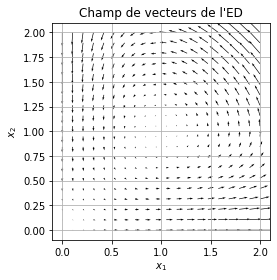

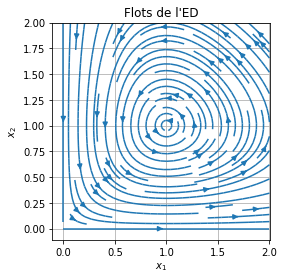

In [3]:
alpha, beta = 1, 1
gamma, delta = 1, 1

N = 20
X = np.linspace(0, 2, N)
Y = np.linspace(0, 2, N)
Grille = np.array(np.meshgrid(X, Y))
Dirs = f(0, Grille)
Pos = np.array(Grille.reshape(2, -1))

plt.quiver(*Pos, *Dirs)
plt.grid()
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.title("Champ de vecteurs de l'ED")
plt.axis('square')
plt.show()

plt.streamplot(X, Y, *Dirs, density = 1)
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.title("Flots de l'ED")
plt.axis('square')
plt.grid()
plt.show()

### Question 3

* Soit $g$ la fonction définie par 
$$
\begin{matrix} g: & I \times \mathbb{R}^2  & \longrightarrow & \mathbb{R}^2 \\
                  & (t,x_1,x_2)     & \longmapsto     & 
                            f(x_1,x_2)
\end{matrix}
$$


Si $x$ est solution des équations de  Lotka-Volterra initialisées à $(t_0,x_0) \in I \times \mathbb{R}^2$, alors $x\in S_g(t_0,x_0)$.
Vérifions que g vérifie les hypothèses du théorème de  Cauchy-Lipschitz : $g$ est continue sur $I\times \mathbb{R}^2$ car $f$ est continue sur $\mathbb{R}^2$. De plus $(t,x)\mapsto \partial_x g(t,x) = J_f(x)$ existe et est continue sur $I\times \mathbb{R}^2$. Nous pourrons donc utiliser le théorème de Cauchy-Lipschitz dans la suite.


* Soit $(t_0,x_0) \in I \times \mathbb{R} ^2$, soit $x$ l'unique solution maximale dans $S_g(t_0,x_0)$ (Cauchy-Lipschitz=, supposons par l'absurde que x ne reste pas dans $\mathbb{R}_{>0} \times \mathbb{R}_{>0}$ sur son domaine de définition. Par continuité de $x$, il existe $t_1 \in I$ tel que par exemple $x_1(t_1) = 0$ (avec $x_1$ la première coordonnée de $x$)(on pourrait faire la chose qui suit avec $x_2(t_1) = 0$).

Alors $x \in  S_g(t_1,(0,x_2(t_1)))$

* Soit $A = \frac{x_2(t_1)}{\exp(-\gamma t_1)}$. On remarque que la fonction
$$ 
\begin{matrix} y: & \mathbb{R}  & \longrightarrow & \mathbb{R}^2 \\
                  & t     & \longmapsto     & 
                            (0,A\exp(-\gamma t))
\end{matrix}
$$ 

vérifie $y \in S_g(t_1,(0,x_2(t_1)))$.

* Finalement, $I \subset \mathbb{R}$ mais comme x est la solution maximale, $I \supset \mathbb{R}$ et l'unicité dans le théorème de Cauchy-Lipschitz donne $x = y$, ce qui est faux car $y$ n'est jamais dans $\mathbb{R}_{>0} \times \mathbb{R}_{>0}$ alors que $x(t_0) \in \mathbb{R}_{>0} \times \mathbb{R}_{>0}$.

Nous avons donc le résultat.

### Question 4

Soit $x: I \longrightarrow \mathbb{R}^2$ une solution initialisée dans $\mathbb{R}_{>0} \times \mathbb{R}_{>0}$, on sait d'après la question précédente que pour tout $t \in I$, $x_1(t) > 0$ et $x_2(t) > 0$, ce qui justifie la bonne définition et la dérivabilité de la fonction que l'on définit sur I par $h(t) = H(x_1(t),x_2(t))$.

Dérivons $h$ : soit $t \in \mathbb{R}$, $h'(t) =\delta \dot{x}_1(t) - \gamma \frac{\dot{x}_1(t)}{x_1(t)} + \beta \dot{x}_2(t) - \alpha \frac{\dot{x}_2(t)}{x_2(t)}$. Nous pouvons alors factoriser les deux premiers termes par $\dot{x}_1$ et les deux derniers par $\dot{x}_2$, puis en utilisant les équations vérifiées par $\dot{x}_1$ et $\dot{x}_2$ on obtient $h'(t) = \frac{\dot{x}_1(t) \dot{x}_2(t)}{x_1(t) x_2(t)} - \frac{\dot{x}_1(t) \dot{x}_2(t)}{x_1(t) x_2(t)} = 0$. La fonction $t \in I \longmapsto H(x_1(t),x_2(t))$ est donc constante.

Nous pouvons donc en déduire que la fonction x est bornée. En effet, si $x$ n'est pas bornée, alors $x_1(t) \sim +\infty$ ou $ x_2(t) \sim + \infty$ quand $t \rightarrow + \infty$. Mais alors $h(t) \underset{t \rightarrow +\infty}{\sim} \delta x_1(t) + \beta x_2(t) \rightarrow +\infty$ (par croissances comparées) ce qui est impossible car h est constante.

Nous pouvons enfin conclure en utilisant le théorème du domaine maximal d'existence : $x$ est définie sur $\mathbb{R}$ car sinon $\|x\|$ divergerait aux bornes de son domaine de définition.

### Question 5

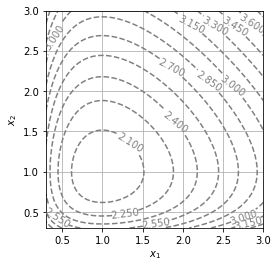

In [4]:
def H(x1, x2):
    a = delta * x1
    b = gamma * np.log(x1)
    c = beta * x2
    d = alpha * np.log(x2)
    return a - b + c - d 


def display_contour(f, x, y, levels):
    X, Y = np.meshgrid(x, y)
    Z = f(X, Y)
    fig, ax = plt.subplots()
    contour_set = plt.contour(
        X, Y, Z, colors="grey", linestyles="dashed", 
        levels=levels 
    )
    ax.clabel(contour_set)
    plt.grid(True)
    plt.xlabel("$x_1$") 
    plt.ylabel("$x_2$")
    plt.gca().set_aspect("equal")
    
display_contour(
    H, 
    x=np.linspace(0.3, 3, 100), 
    y=np.linspace(0.3, 3, 100), 
    levels=15
)


Le point $\bar{x}$ est la seule courbe de niveau réduite  un point, c'est à dire ici en (1,1).

On peut le trouver par plusieurs méthodes :

* Par ses coordonnées : on sait que $\bar{x} = (\frac{\gamma}{\delta}, \frac{\alpha}{\beta})$.

* Par une autre méthode : d'une part on sait que pour tous les points de $\mathbb{R}_{>0} \times \mathbb{R}_{>0}$, il existe au moins une solution des équations de Lotka-Volterra qui passe par ces points. D'autre part, soit $y \in \mathbb{R}_{>0} \times \mathbb{R}_{>0}$ qui n'est pas un point d'équilibre, et $x$ une solution qui passe par $y$ et qui atteint d'autres points de $\mathbb{R}_{>0} \times \mathbb{R}_{>0}$ ($x$ existe car $y$ n'est pas un point d'équilibre). Alors d'après la question précédente la courbe définie par $x$ est incluse dans une même courbe de niveau, et n'est pas réduite à un point. On déduit de cela que seul un point d'équilibre peut être en (1,1), qui est la seule courbe de niveau réduite à un point. En conclusion $\bar{x}$ est en (1,1). 

On en conclut aussi que les solutions parcourent une même courbe de niveau de H.

Graphiquement, on voit que $\bar{x}$ est stable car on voit que si un point est suffisamment proche de $\bar{x}$, toute la courbe de niveau de H sur laquelle il se trouve est arbitrairement proche de $\bar{x}$ or d'après la question précédente l'ensemble d'arrivée de la solution est inclus dans cette courbe de niveau : les solutions restent donc arbitrairement proches de $\bar{x}$ lorsqu'elles sont initialisées proche de $\bar{x}$. Ce point d'équilibre est donc stable.

### Question 6

In [5]:
def solve_euler_explicit(f, x0, dt, t0, tf):
    t = [t0]
    x = [x0]
    while t[-1] + dt <= tf:
        x0 = x[-1]
        x1 = x0 + dt * f(t[-1], x0)
        x.append(x1)
        t1 = t[-1] + dt
        t.append(t1)
    return np.array(t), np.array(x)


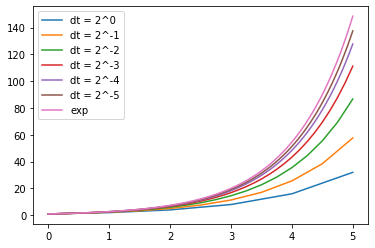

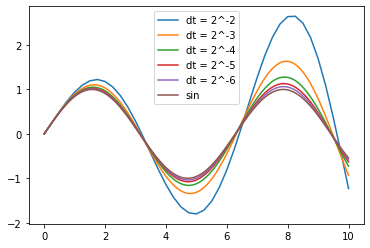

In [6]:
def f1(t, x):                           # Equation de l'exponentielle
    return x

def f2(t, x):                           # Vectorisation de l'oscillateur harmonique
    return np.array([-x[1], x[0]])

for i in range(6):                      # Convergence de l'exponentielle
    dt = 2**(-i)
    plt.plot(*solve_euler_explicit(f1, 1, dt, 0, 5), label = f'dt = 2^{-i}')
t = solve_euler_explicit(f1, 1, dt, 0, 5)[0]
plt.plot(t, np.exp(t), label='exp')
plt.legend()
plt.show()

for i in range(2,7):                    # Convergence du sinus
    dt = 2**(-i)
    t, x = solve_euler_explicit(f2, [1, 0], dt, 0, 10)
    plt.plot(t, x[:,1], label = f'dt = 2^{-i}')
plt.plot(t, np.sin(t), label='sin')
plt.legend()
plt.show()

### Question 7

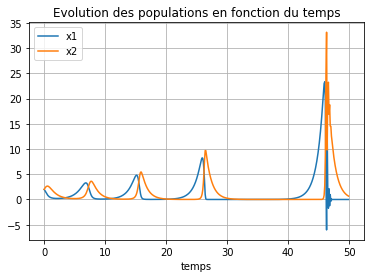

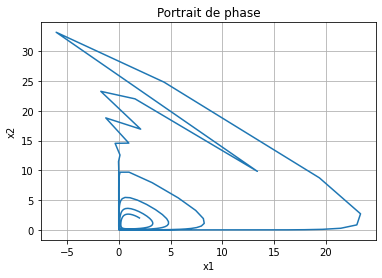

<ipython-input-4-7c130b452082>:3: RuntimeWarning: invalid value encountered in log
  b = gamma * np.log(x1)


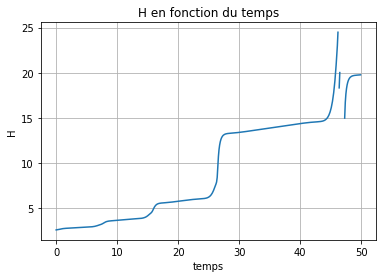

In [7]:
x10, x20 = 2, 2
dt = 0.1
t, x = solve_euler_explicit(f, [x10, x20], dt, 0, 50)
X1, X2 = x[:, 0], x[:, 1]

plt.plot(t, X1, label = 'x1')
plt.plot(t, X2, label = 'x2')
plt.title('Evolution des populations en fonction du temps')
plt.xlabel('temps')
plt.legend()
plt.grid()
plt.show()

plt.plot(X1, X2)
plt.title('Portrait de phase')
plt.xlabel('x1')
plt.ylabel('x2')
plt.grid()
plt.show()

plt.plot(t, H(X1, X2))
plt.title('H en fonction du temps')
plt.xlabel('temps')
plt.ylabel('H')
plt.grid()
plt.show()

L'évolution des populations jusqu'à $t=30$ parait cohérente.
On voit apparaitre des incohérences au niveau du pic à $t=46$ où des oscillations de plus hautes fréquences démarrent.
On voit très nettement ce changement de comportement sur le portrait de phase, avec des "éclairs" qui ne suivent pas les flots que l'on a à la question 2.

De plus, H est sensé reste constant au cours de l'évolution. Or, on s'apperçoit que dès le départ H varie, et encore plus à partir de $t=25$.

### Question 8

In [8]:
eps = 10**(-4)

def solve_euler_implicit(f, x0, dt, t0, tf, itermax = 100):
    x = [x0]
    t = [t0]
    tj = t0
    xj = x0
    def Fj(x):
        return xj + dt*f(tj, x)
    
    while tj + dt <= tf :
        xj0 = Fj(xj)
        xjk = xj0
        tj += dt
        xjk1 = Fj(xjk)
        i = 1
        while np.linalg.norm((xjk1 - xjk)/xj0) >= eps and i <= itermax:
            #print((xjk1 - xjk)/xj0)
            xjk, xjk1 = xjk1, Fj(xjk1)
            #print(xjk1)
            i += 1
        xj = xjk1
        t.append(tj)
        x.append(xjk1)
    
    t = np.array(t)
    x = np.array(x)
    return t, x

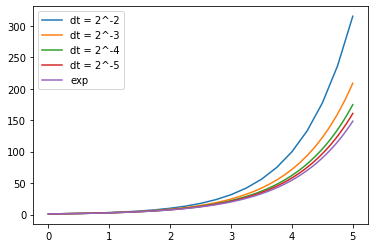

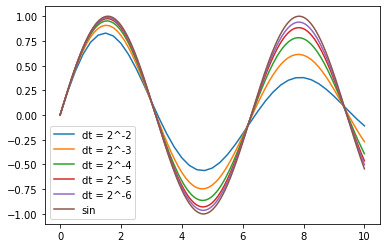

In [9]:
def f1(t, x):                           # Equation de l'exponentielle
    return x

def f2(t, x):                           # Vectorisation de l'oscillateur harmonique
    return np.array([-x[1], x[0]])

for i in range(2,6):                      # Convergence de l'exponentielle
    dt = 2**(-i)
    t, x = solve_euler_implicit(f1, 1, dt, 0, 5)
    plt.plot(t, x, label = f'dt = 2^{-i}')
t = solve_euler_implicit(f1, 1, dt, 0, 5)[0]
plt.plot(t, np.exp(t), label='exp')
plt.legend()
plt.show()

for i in range(2,7):                    # Convergence du sinus
    dt = 2**(-i)
    t, x = solve_euler_implicit(f2, [1, 0], dt, 0, 10)
    plt.plot(t, x[:,1], label = f'dt = 2^{-i}')
plt.plot(t, np.sin(t), label='sin')
plt.legend()
plt.show()

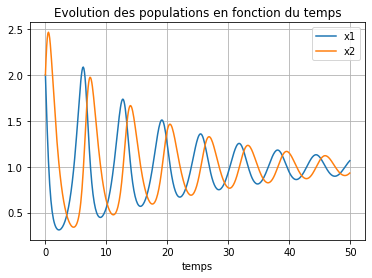

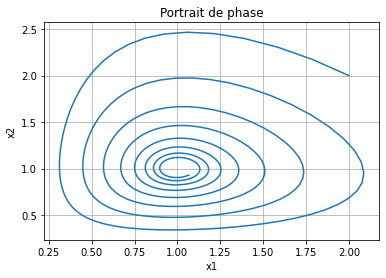

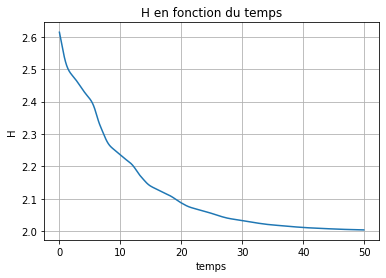

In [10]:
x10, x20 = 2, 2
dt = 0.1
t, x = solve_euler_implicit(f, [x10, x20], dt, 0, 50, 100)
X1, X2 = x[:, 0], x[:, 1]

plt.plot(t, X1, label = 'x1')
plt.plot(t, X2, label = 'x2')
plt.title('Evolution des populations en fonction du temps')
plt.xlabel('temps')
plt.legend()
plt.grid()
plt.show()

plt.plot(X1, X2)
plt.title('Portrait de phase')
plt.xlabel('x1')
plt.ylabel('x2')
plt.grid()
plt.show()

plt.plot(t, H(X1, X2))
plt.title('H en fonction du temps')
plt.xlabel('temps')
plt.ylabel('H')
plt.grid()
plt.show()

### Question 9

Nous avons montré dans la question 4 que $H$ est constant le long d'une solution des équations de Lotka-Voltera. Si on pose $H_0=H(x(0))$, avec $x$ une solution des équations de Lotka-Voltera, on a 
$$
(H\circ x-H_0)(0)=0 \mbox{ et } \forall t \in \mathbb{R}, (H\circ x - H_0)(t)=0
$$. 
Ainsi, pour tout $u$, le nouveau système est équivalent au système d'équations de Lotka-Voltera donc les solutions sont identiques.

### Question 10

* Soit $x = (x_1, x_2)$ une solution du nouveau système d'équations.
$$
\begin{aligned} 
\frac{d}{dt}(H(x(t))-H_0)=\frac{dH}{dt}(x_1(t),x_2(t)) & =\frac{\partial H}{\partial x_1}(x_1,x_2).\dot{x_1}(t) + \frac{\partial H}{\partial x_2}(x_1,x_2).\dot{x_2}(t) \\
& =(\delta - \frac{\gamma}{x_1})\dot{x_1}+(\beta - \frac{\alpha}{x_2})\dot{x_2}
\end{aligned}
$$
$x$ étant solution du système au dessus, on peut remplacer la valeur des dérivées, et après calcul on obtient :
$$ 
\frac{d}{dt}(H(x(t))-H_0)=-\left[H(x(t))-H_0 \right]\left[u_1\left(\delta-\frac{\gamma}{x_1}\right)+u_2\left(\beta - \frac{\alpha}{x_2}\right)\right]
$$
* Pour tenter de mettre sous la forme demandée dans l'énoncé, on commence par calculer $\left\|\nabla H(x(t))\right\| ^2$.
$$
\nabla H(x(t))= \begin{pmatrix} \frac{\partial H}{\partial x_1} \\ \frac{\partial H}{\partial x_2}\end{pmatrix} = \begin{pmatrix} \delta-\frac{\gamma}{x_1} \\ \beta-\frac{\alpha}{x_2} \end{pmatrix}
$$

Ainsi, $\left\|\nabla H(x(t))\right\| ^2 = \left(\delta-\frac{\gamma}{x_1}\right)^2 + \left(\beta-\frac{\alpha}{x_2}\right)^2$.
Il suffit donc de poser 
$$
\begin{matrix}
u: & \mathbb{R}^2 & \longrightarrow & \mathbb{R}^2 \\
   & (x_1, x_2)   & \longmapsto     & \begin{cases} \delta-\frac{\gamma}{x_1} \\ \beta-\frac{\alpha}{x_2} \end{cases}
\end{matrix}
$$
qui est bien défini car une solution du système est à valeur dans $\mathbb{R}_{>0}^2$. De cette manière, en considérant $u^k=k.u$ on obtient bien :
$$
u_1^k\left(\delta-\frac{\gamma}{x_1}\right)+u_2^k\left(\beta - \frac{\alpha}{x_2}\right) = k.\left\|\nabla H(x(t))\right\| ^2
$$
et alors,
$$
\frac{d}{dt}(H(x(t))-H_0)=-k.\left\|\nabla H(x(t))\right\| ^2\left[H(x(t))-H_0 \right]